In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import datetime as dt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv("Jisdoredit1.csv", parse_dates = True, index_col = 0)
df.head(10)

,Rate
Date,
2019-12-09,14021
2019-12-10,14004
2019-12-11,14025
2019-12-12,14042
2019-12-13,13982
2019-12-16,14004
2019-12-17,14018
2019-12-18,14007
2019-12-19,13983


In [21]:
df.describe()

,Rate
count,544.000000
mean,14423.088235
std,483.949870
min,13612.000000
25%,14177.750000
50%,14341.500000
75%,14548.250000
max,16741.000000


In [22]:
df.shape

(544, 1)

Text(0, 0.5, 'USD/IDR Spot Price')

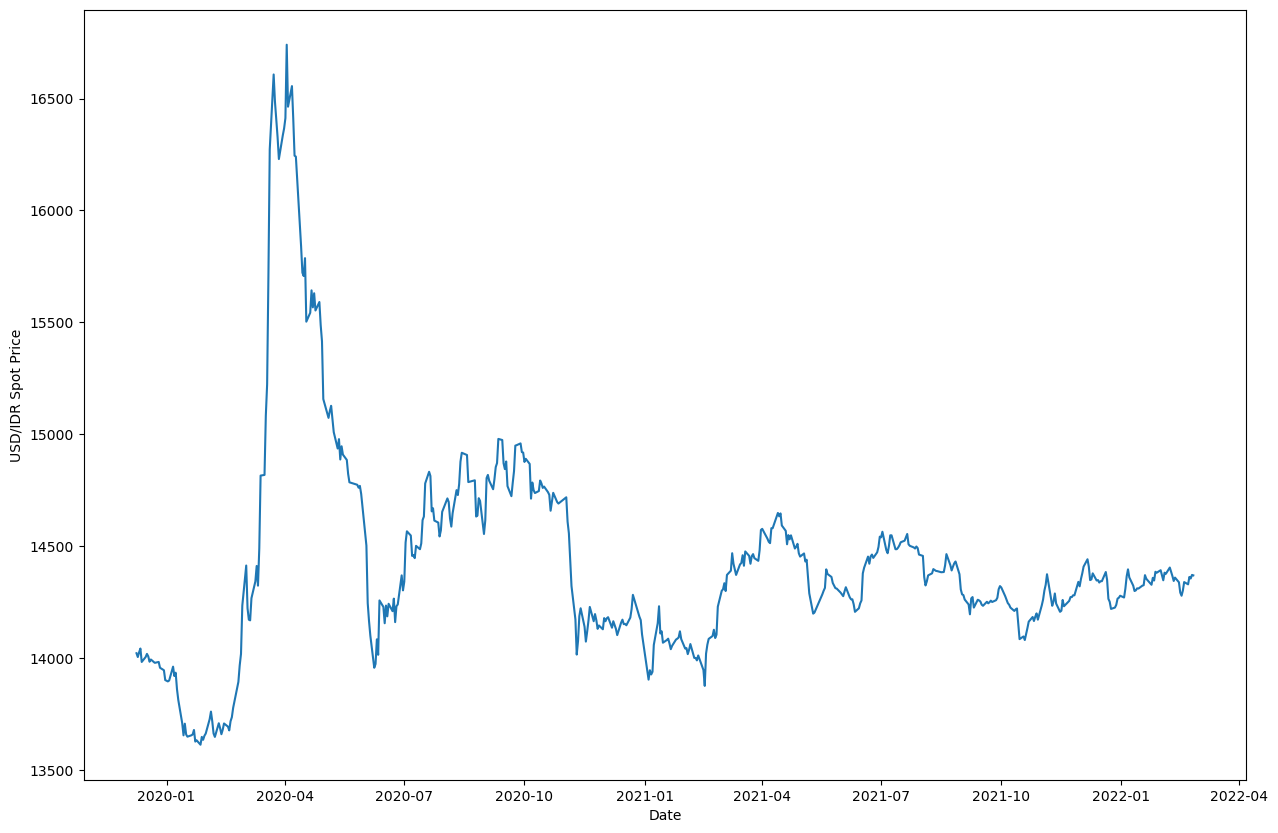

In [23]:
plt.rcParams["figure.figsize"]=(15,10)
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('USD/IDR Spot Price')

In [24]:
train = df['Rate'][:505]
test = df['Rate'][505:]
train.tail()

Date
2021-12-27    14225
2021-12-28    14237
2021-12-29    14265
2021-12-30    14269
2021-12-31    14278
Name: Rate, dtype: int64

In [25]:
test.head()

Date
2022-01-03    14270
2022-01-04    14310
2022-01-05    14365
2022-01-06    14396
2022-01-07    14360
Name: Rate, dtype: int64

Text(0, 0.5, 'USD/IDR Spot Price')

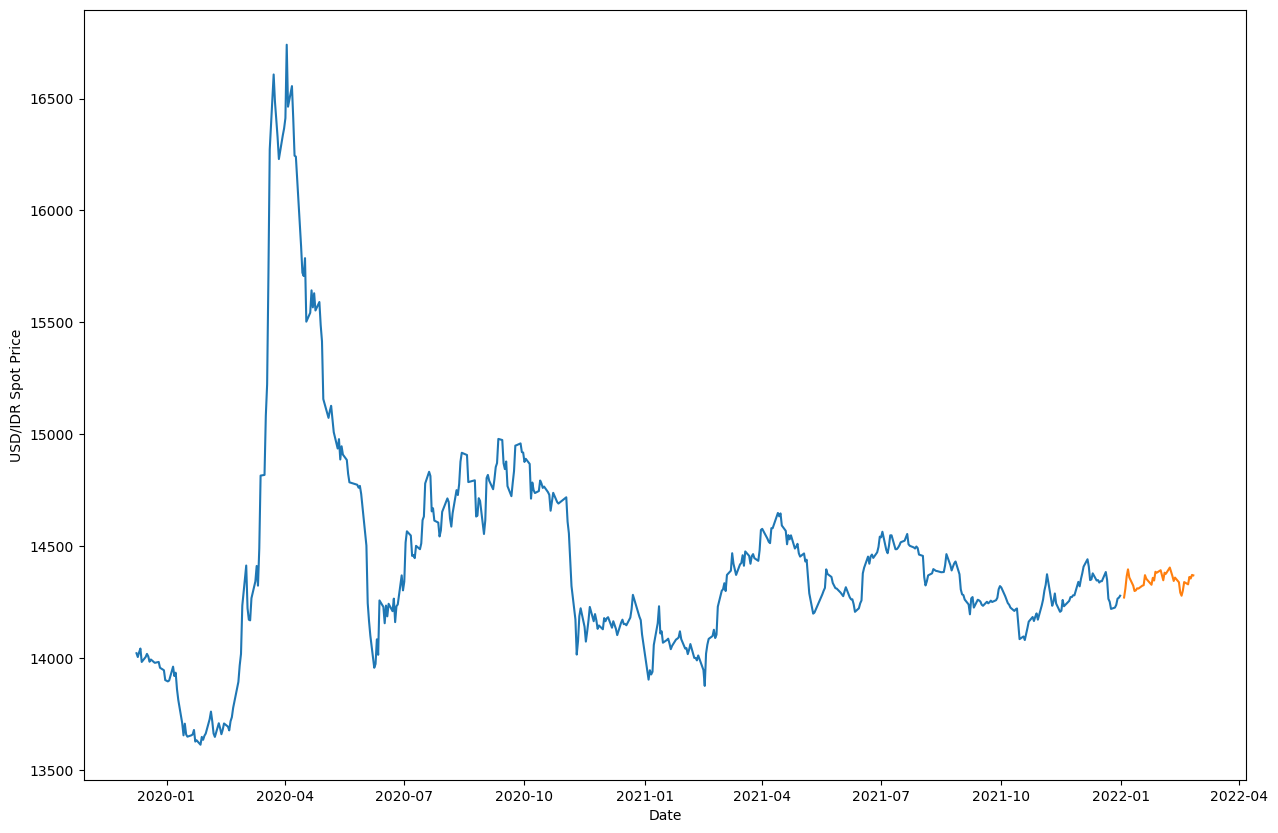

In [26]:
plt.figure(figsize=(15,10))
plt.plot(train)
plt.plot(test)
plt.xlabel('Date')
plt.ylabel('USD/IDR Spot Price')

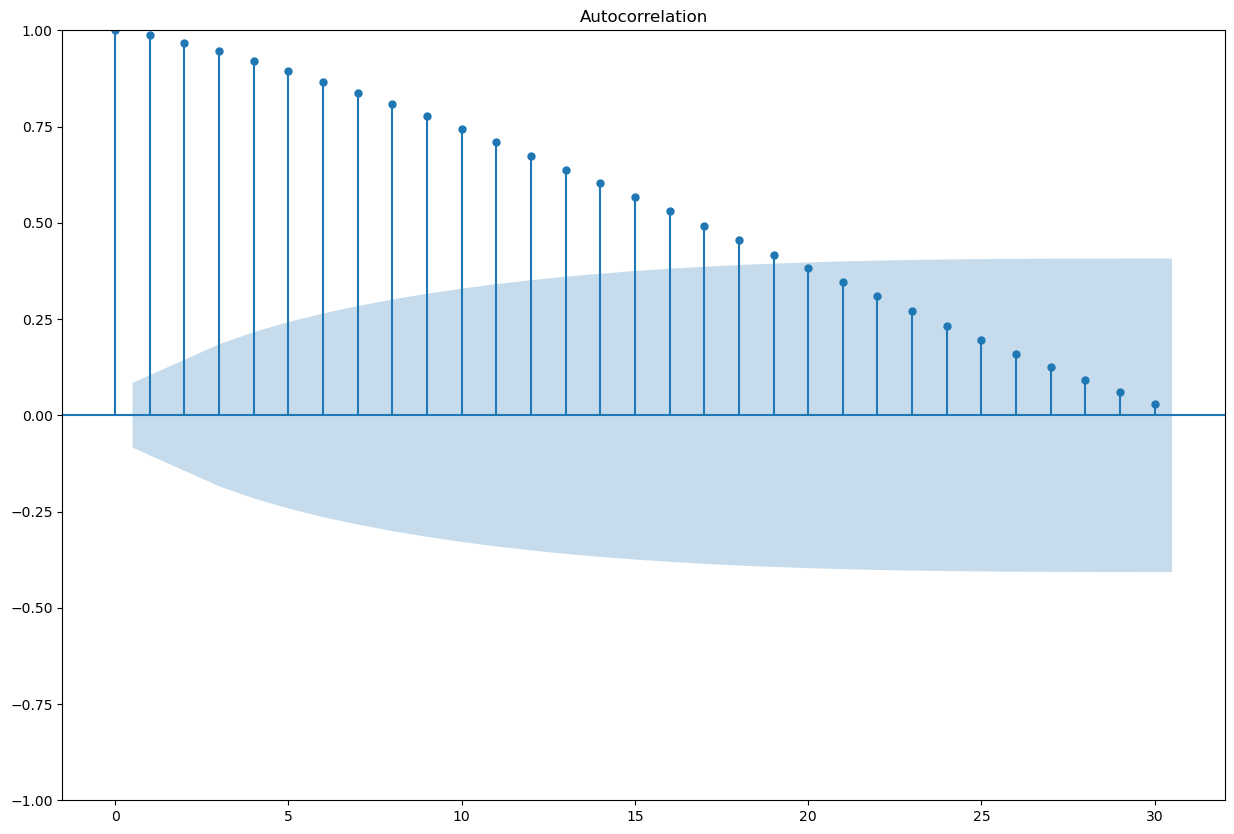

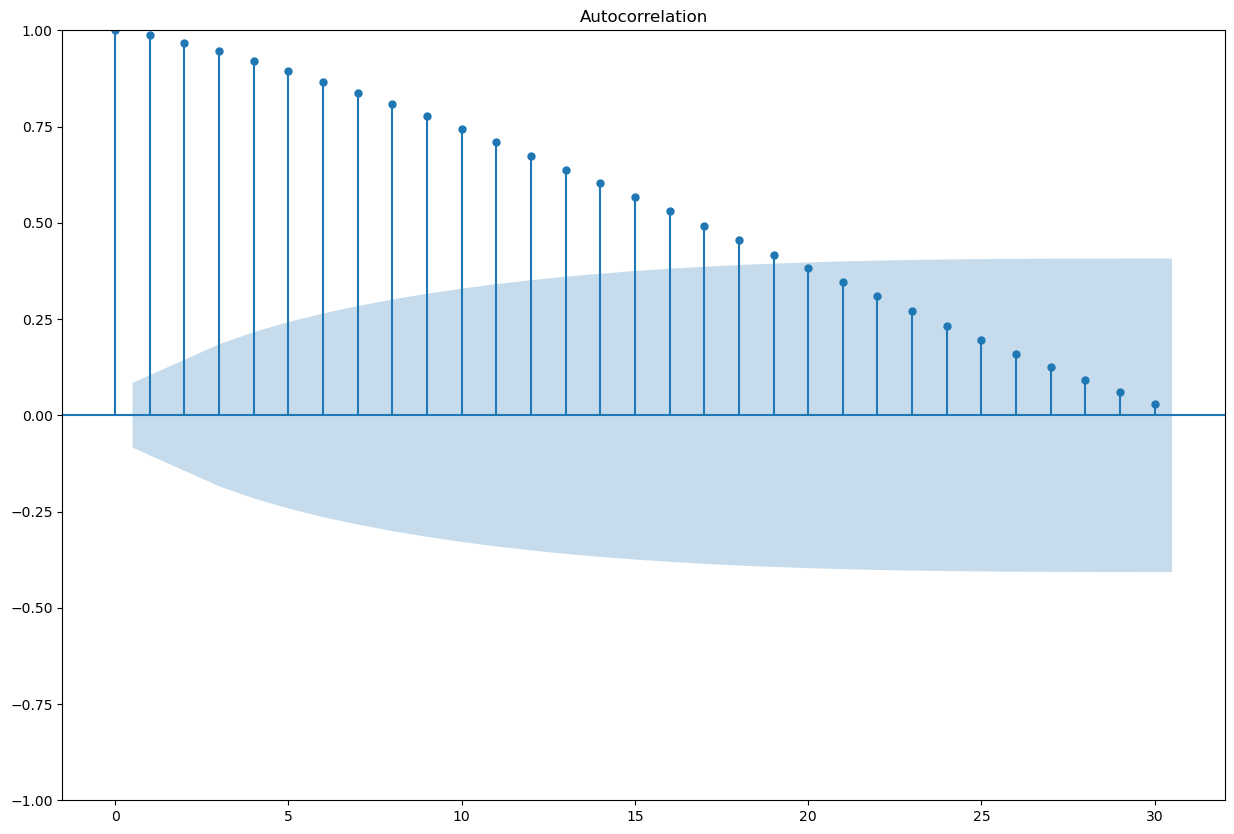

In [27]:
plot_acf(df['Rate'], lags=30, alpha=0.05)

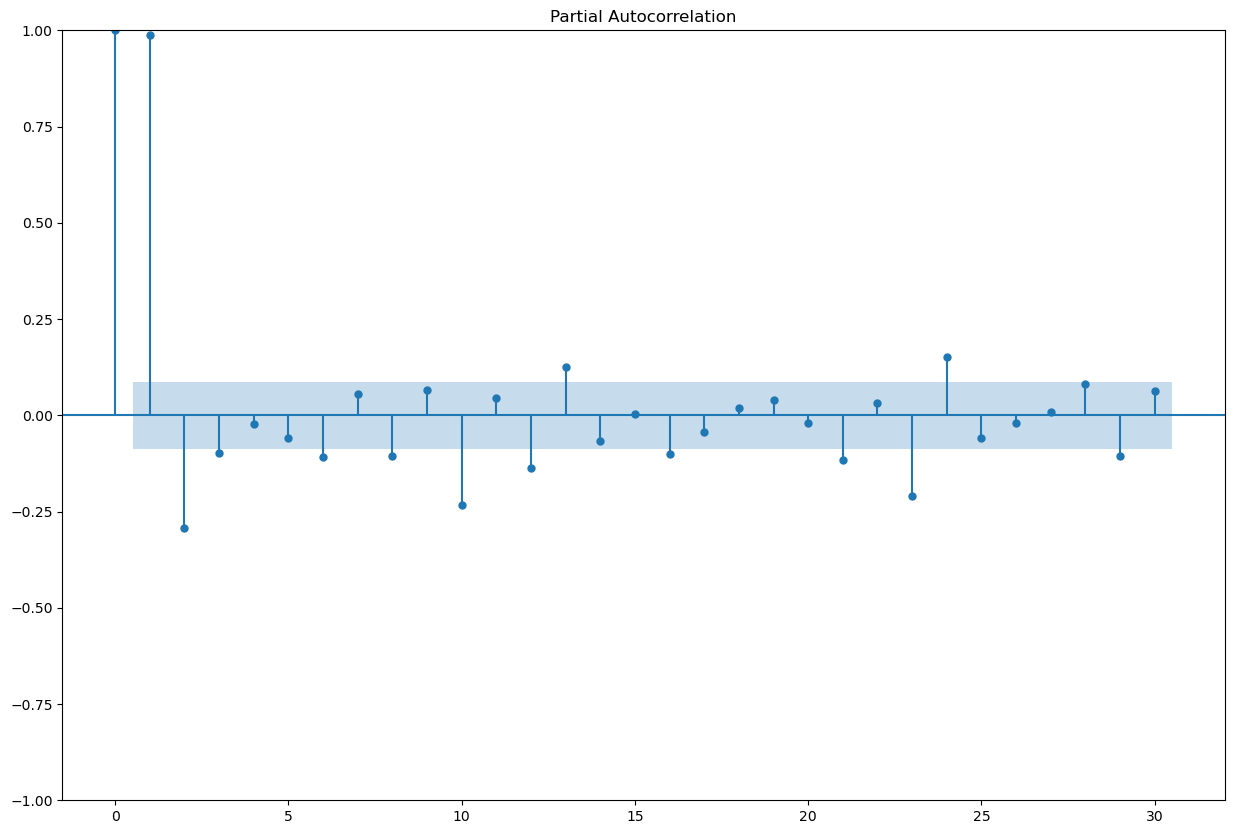

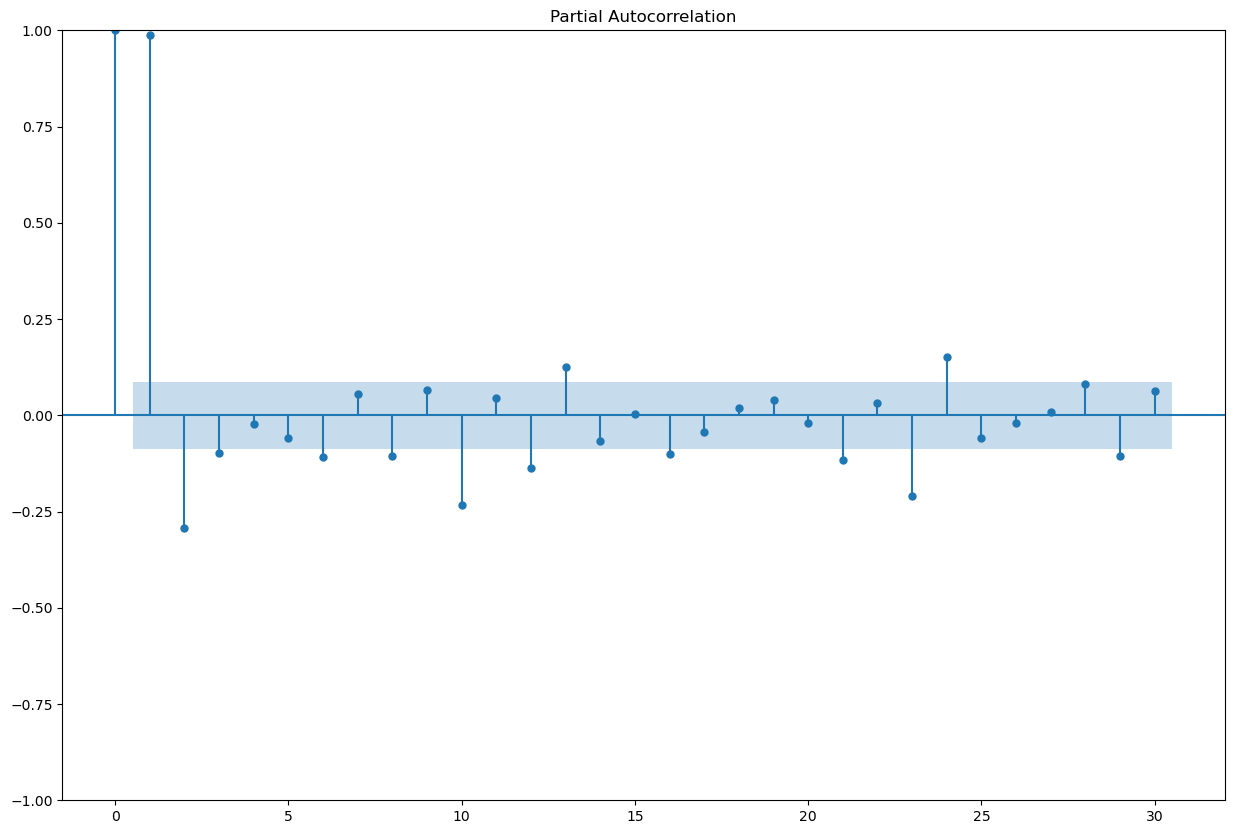

In [28]:
plot_pacf(train, lags=30, alpha=0.05)

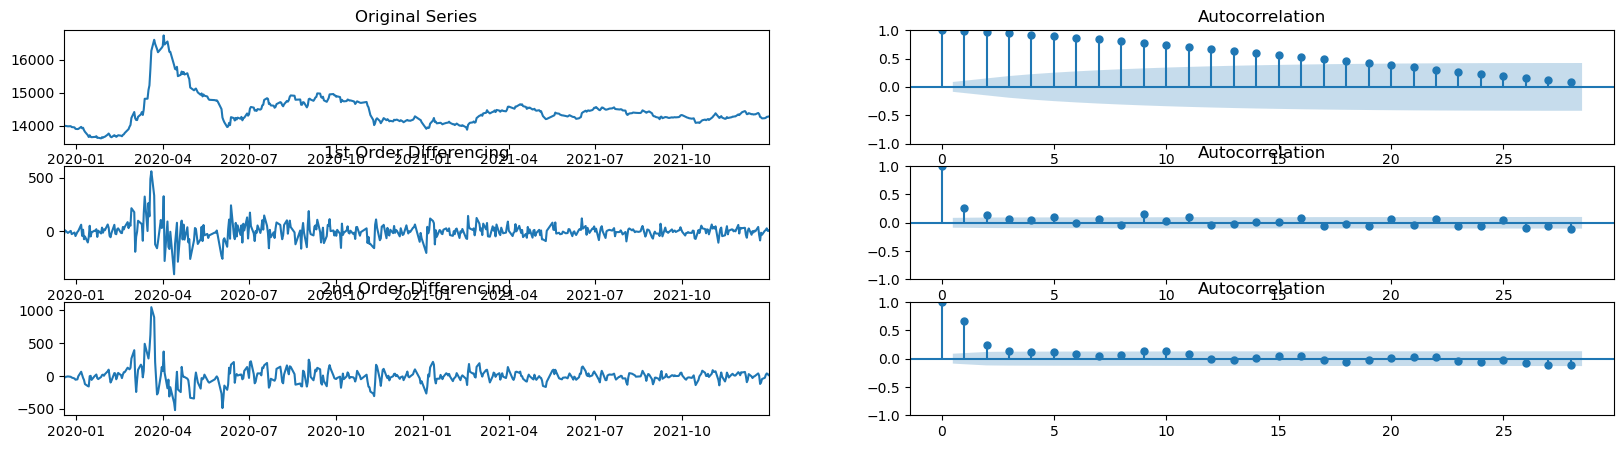

<Figure size 1500x1000 with 0 Axes>

In [29]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(20, 5))
axes[0, 0].plot(df['Rate']); axes[0, 0].set_title('Original Series')
axes[0, 0].set_xlim(dt.datetime(2019,12,19), dt.datetime(2021,12,31))
plot_acf(train, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Rate'].diff()); axes[1, 0].set_title('1st Order Differencing')
axes[1, 0].set_xlim(dt.datetime(2019,12,19), dt.datetime(2021,12,31))
plot_acf(train.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Rate'].diff(2)); axes[2, 0].set_title('2nd Order Differencing')
axes[2, 0].set_xlim(dt.datetime(2019,12,19), dt.datetime(2021,12,31))
plot_acf(train.diff(2).dropna(), ax=axes[2, 1])

plt.show()
plt.tight_layout()

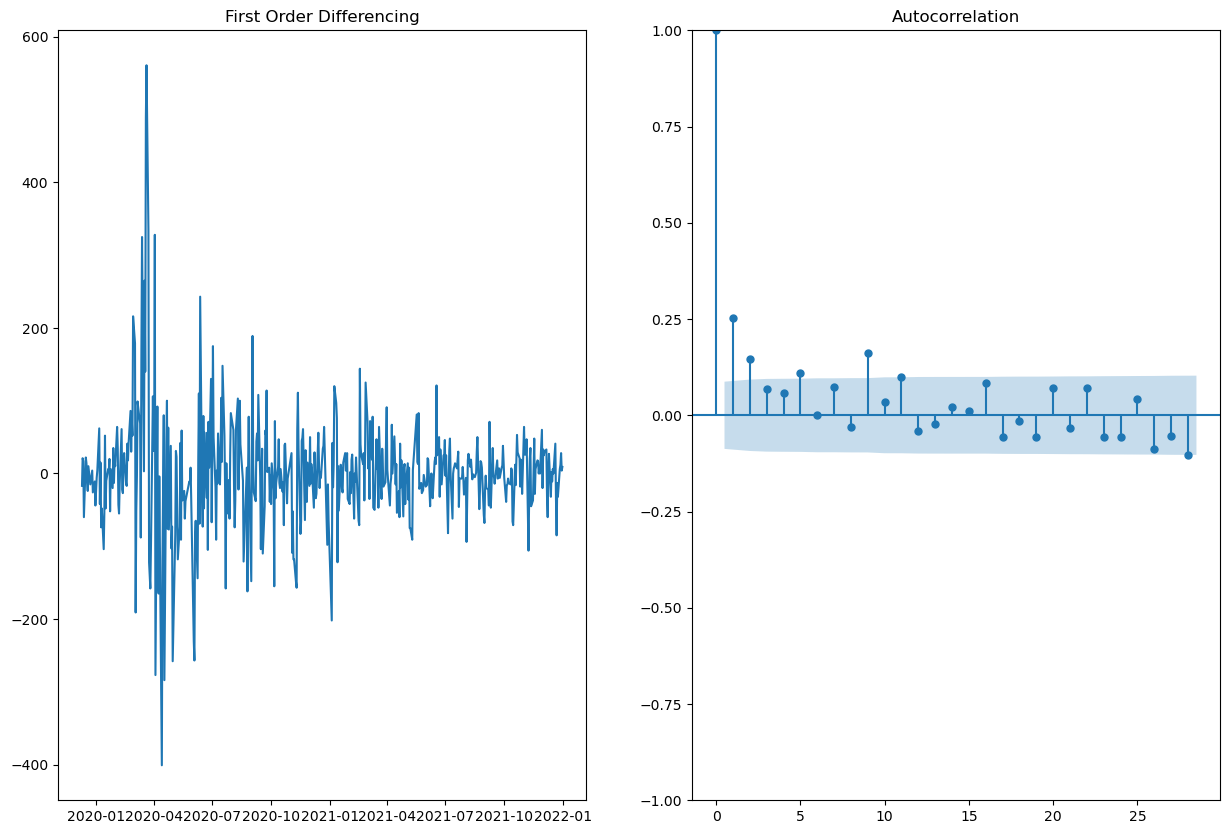

<Figure size 1500x1000 with 0 Axes>

In [30]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('First Order Differencing')
ax1.plot(train.diff())

ax2 = f.add_subplot(122)
plot_acf(train.diff().dropna(),ax=ax2)
plt.show()
plt.tight_layout()

In [31]:
result = adfuller(train.dropna())
print('p-value original: ', result[1])

result = adfuller(train.diff().dropna())
print('p-value first differencing: ', result[1])

result = adfuller(train.diff(2).dropna())
print('p-value second differencing: ', result[1])

p-value original:  0.014387503561488975
p-value first differencing:  1.8528468979443708e-06
p-value second differencing:  0.000781144553760787


In [32]:
# Fit auto_arima function to Jisdoredit1 dataset
df_fit = auto_arima(train, start_p = 1, start_q = 1,test='adf',
                          max_p = 5, max_q = 5, m = 1,
                          start_P = 0, seasonal = False,
                          d = None, D = 0, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

df_fit.summary() # To print the summary

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5800.068, Time=1.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5833.465, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5802.431, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5808.408, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5831.487, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5801.016, Time=0.85 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5801.501, Time=0.66 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5801.903, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5800.527, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5795.129, Time=1.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5764.490, Time=1.79 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5802.508, Time=1.15 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5805.596, Time=1.88 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5802.295, Time=2.82 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  505
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -2875.104
Date:                Tue, 26 Mar 2024   AIC                           5762.208
Time:                        06:41:49   BIC                           5787.544
Sample:                             0   HQIC                          5772.146
                                - 505                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5435      0.029    -53.051      0.000      -1.600      -1.486
ar.L2         -0.3510      0.043     -8.161      0.000      -0.435      -0.267
ar.L3          0.3074      0.023     13.468      0.000       0.263       0.352
ma.L1          1.8644      0.027     67.914      0.000       1.811       1.918
ma.L2          0.9235      0.027     34.143      0.000       0.870       0.976
sigma2      5264.6109    191.676     27.466      0.000    4888.933    5640.289
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               892.77
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

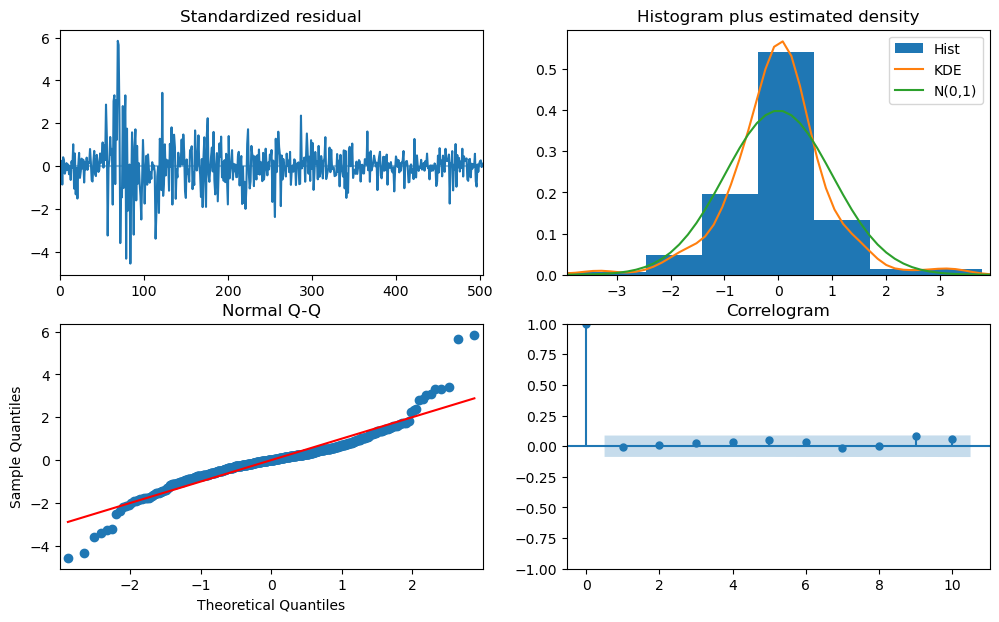

In [33]:
df_fit.plot_diagnostics(figsize=(12,7))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

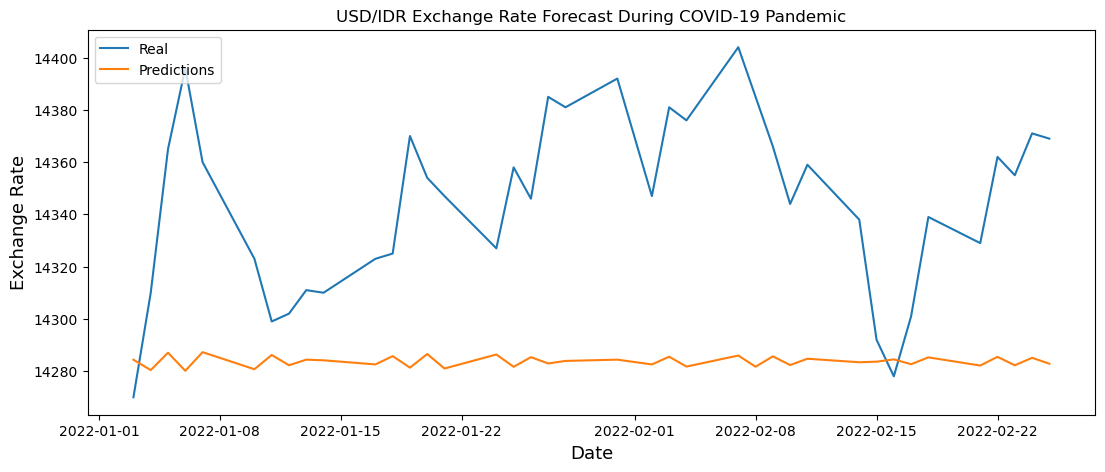

In [35]:
prediction = pd.DataFrame(df_fit.predict(n_periods = 39),index=test.index)
prediction.columns = ['predicted_values']

pd.options.mode.chained_assignment = None

dtrain = df[:505]
valid = df[505:]
valid['Predictions'] = prediction
plt.figure(figsize=(13,5))
plt.title('USD/IDR Exchange Rate Forecast During COVID-19 Pandemic')
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Exchange Rate', fontsize = 13)
plt.plot(valid[['Rate', 'Predictions']])
plt.legend(['Real', 'Predictions'], loc = 'upper left')
plt.show

In [36]:
prediction = prediction.to_numpy()
test = test.to_numpy()
mse = np.square(np.subtract(test,prediction)).mean()
rmse = np.sqrt(np.mean((prediction - test)**2))
mape = np.mean(np.abs((test - prediction)/ test))*100
mse

0.4326409631011842

In [37]:
rmse

69.65187082231662

In [38]:
mape

0.4326409631011842